<a href="https://colab.research.google.com/github/florenciaolivares/Modulo-Tarea-2/blob/main/Tarea%202%20Terminada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 2: Análisis Estadístico Simple**
En esta tarea continuaremos practicando con *Numpy, Pandas y Matplotlib* mientras también aprenderán a realizar análisis estadísticos básicos con estas librerías.

A estas alturas ya deben tener una noción de estadística y su aplicación en astronomía. La tarea consiste en hacer estimaciones sencillas a partir de datos astronómicos, usando herramientas básicas de Python que permiten trabajar con la estadística de distribuciones de datos.

La tarea está dividida en dos partes. La primera consiste en realizar una estimación del movimiento propio de un cúmulo globular ubicado en el halo de nuestra Galaxia a partir de la distribución de estos datos. La segunda parte consiste en comprobar cómo cambia la Señal a Ruido (S/N) al promediar varios espectros de un objeto. No es necesario que tengan conocimientos previos de astronomía por ahora, basta con que sepan manipular los datos indicados.

Esta tarea involucra la creación de varias figuras. Así que **póngase creativo con las figuras :D, sus colores, formas, leyendas, etc. También asegúrese de siempre colocar un título y nombre a los ejes!**

In [1]:
# Antes de comenzar con la tarea debe correr esta celda para importar las librerías principales a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Primera parte: Estimar movimiento propio del cúmulo globular NGC 5694


En esta primera parte trataremos de estimar una cantidad en astronomía que se llama "movimiento propio" para un cúmulo globular llamado [NGC 5694](https://en.wikipedia.org/wiki/NGC_5694). Éste cúmulo globular se encuentra en el halo de nuestra Vía Láctea.

El movimiento propio de una estrella es el desplazamiento que esta tiene en el cielo, visto desde la Tierra, con el paso del tiempo. Aunque las estrellas parecen fijas a simple vista, en realidad se están moviendo a través del espacio. El movimiento propio mide este cambio en la posición de la estrella, no hacia nosotros ni alejándose, sino moviéndose de forma lateral en el cielo. Las unidades de medida de esta cantidad son mas/yr (miliarcseconds per year), una cantidad muuuuuuy pequeña.

Para que dimensione lo pequeña que es esta cantidad, calcule cuántos años le tomaría a una estrella, que se desplaza exclusivamente en dirección horizontal en el cielo con un movimiento propio de 1mas/yr, cubrir una distancia de 0.5 grados en el cielo en la misma dirección (equivalente al tamaño aparente de la Luna en el cielo).

Hint: 1 grado corresponde a $3.6$ x $10^6$ mas.

In [2]:
# Primero, calculamos a cuántos mas corresponden 0.5 grados:
mas = 3.6 * 10**6 / 2

# Luego, como tiene un movimiento propio de 1mas/yr, por regla de 3 simple se concluye que el tiempo que la estrella tarda en recorrer esa distancia está dado por
años = (3.6 * 10**6 / 2) * 1 / 1

print(años)

# Es decir, se tardará 1800000 años (1,8 millones de años) en recorrer 0,5 grados en el cielo.


1800000.0


### a) Cargar los Datos

Primero debe montar el drive, lo que permite leer archivos guardados en el mismo. Para esto debe correr la celda de abajo.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importe el archivo **ngc5694_pm.csv** utilizando la función **pd.read_csv(path)** y guárdelo como **data**.

En la barra de herramientas ubicada en la izquierda, puede encontrar la ruta (path) al archivo "ngc5694_pm.csv" dentro de su drive. Copie la ruta y cargue dicha base de datos en la siguiente celda como se le indica.

In [4]:
path_archivo = '/content/drive/MyDrive/Astro y Cs de Datos/ngc5694_pm.csv'

data = pd.read_csv(path_archivo)

### b) Explorar el DataFrame
Explore las columnas del archivo y muestre el DataFrame

In [5]:
# Muestra las columnas aquí
data.columns

Index(['Unnamed: 0', 'ra', 'dec', 'pmra', 'pmdec'], dtype='object')

In [6]:
# Muestra el DataFrame aquí
data

,Unnamed: 0,ra,dec,pmra,pmdec
0,0,219.370629,-27.312548,0.053134,-1.674613
1,1,219.373996,-27.243801,-0.960711,-0.283708
2,2,219.363458,-27.213113,0.674957,-1.741153
3,3,219.336931,-27.172985,-0.057975,-0.564131
4,4,219.463706,-27.189408,-0.438914,-0.487856
...,...,...,...,...,...
616,616,220.732855,-26.148055,-0.269935,-0.891652
617,617,220.710525,-26.150902,-0.962554,-0.400258
618,618,219.327652,-27.267281,-0.796753,-0.266571
619,619,219.225796,-27.172318,-0.901963,-0.302597


### c) Graficar un scatter plot
Cada fila del DataFrame corresponde a una estrella del cielo y, como habra notado, hay dos columnas denominadas **pmra** y **pmdec**. Estas representan el movimiento propio en ascensión recta y el movimiento propio en declinación, respectivamente, que son los desplazamientos de una estrella en dos ejes distintos del cielo: RA y DEC.

Selecciona del DataFrame los datos de las columnas **pmra** y **pmdec** y guárdalos en las variables indicadas. Luego, realiza un gráfico de dispersión (scatter plot) colocando en el eje x los datos de "pmra" y en el eje y los de "pmdec".

In [7]:
#Seguimos la notación de Pandas para extraer los datos de cada columna
pmra = data["pmra"]
pmdec = data["pmdec"]

Text(0, 0.5, 'En declinación (pmdec)')

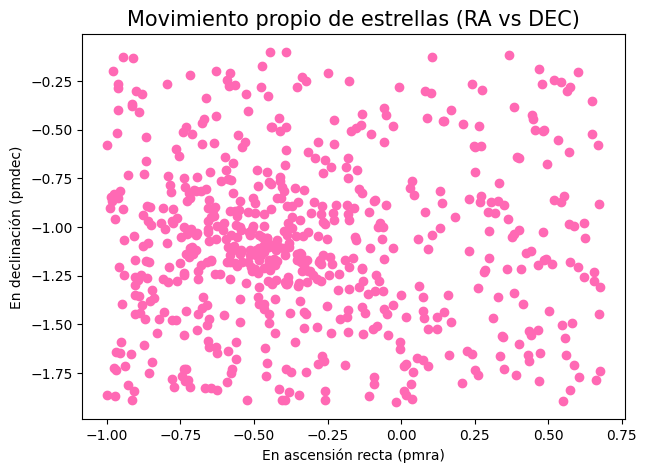

In [8]:
#Graficamos utilizando lo aprendido en la tarea pasada :)
plt.figure(figsize=(7,5))
plt.scatter(pmra, pmdec, color="hotpink")
plt.title("Movimiento propio de estrellas (RA vs DEC)" , fontsize=15)
plt.xlabel("En ascensión recta (pmra)")
plt.ylabel("En declinación (pmdec)")

Si observa bien, parece que los puntos se concentran hacia la parte izquierda del gráfico. Ese grupo representa los movimientos propios de las estrellas que pertencen al cúmulo globular. Los demás puntos corresponden a los movimientos propios de estrellas de la galaxia que se "colaron" en la línea de visión entre nosotros (Tierra) y el cúmulo.

### c) Generar distribución Gaussiana
Calcule el promedio y la desviación estándar de ambas columnas (**pmra** y **pmdec**) y guárdelos en las variables que se indican.

In [9]:
mu_pmra = pmra.mean()
std_pmra = pmra.std()

mu_pmdec = pmdec.mean()
std_pmdec = pmdec.std()

Con los promedios y desviaciones estandar obtenidas, simule una distribución gaussiana para cada eje del movimieto propio (pmra y pmdec). Recuerda que la distribución gaussiana es de la forma:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$


Por lo que necesitamos los valores de $x, \mu$ y $\sigma$ para cada caso.

**En ascención recta**:
1. Crea un arreglo de 300 números que estén entre -1.5 y 1. Este sería el $x$
2. Con $\mu$ y $\sigma$ correspondientes a pmra calculados en la celda de arriba, genere los valores $f(x)$. Para eso, utilize la función **norm** de **scipy.stats** que está importada en la siguiente celda. Usa el método **pdf** (probability density function)



**En declinación:**
Haga lo mismo, pero el $x$ sería 300 números que estén entre -2.5 y 0.5.

In [11]:
from scipy.stats import norm

#Leyendo la documentación, ví que en la función norm, loc corresponde al promedio y scale especifica la desviación estándar. Entendiendo eso, pude utilizar el método pdf correctamente.

x_pmra = np.linspace(-1.5,1,300) #Creamos el arreglo de 300 números en el rango indicado
fx_pmra = norm.pdf(x_pmra, mu_pmra, std_pmra) #Calculamos f(x)

x_pmdec = np.linspace(-2.5,0.5,300) #Calculamos f(x)
fx_pmdec = norm.pdf(x_pmdec, mu_pmdec, std_pmdec) #Creamos el arreglo de 300 números en el rango indicado

### d) Graficar histogramas de la distribución de movimientos propios junto a la distribución Gaussiana

Grafique con matplotlib un histograma (busque qué método de matplotlib sirve) de pmra y sobre él grafique la gaussiana correspondiente.

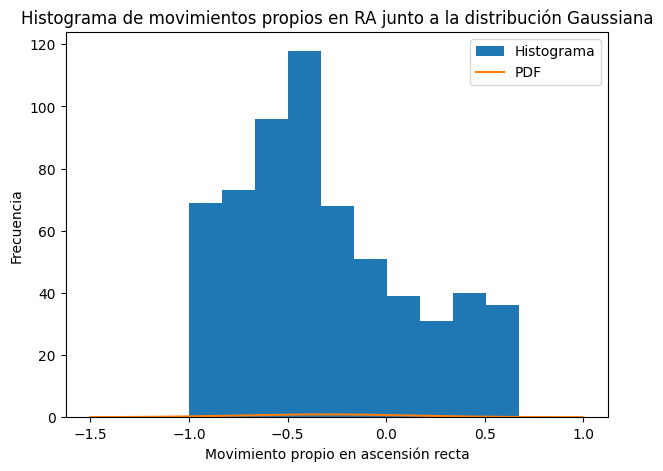

In [12]:
#Nuevamente, graficamos utlizando el módulo pyplot
plt.figure(figsize=(7,5))
plt.hist(pmra, label = "Histograma")
plt.plot(x_pmra,fx_pmra, label="PDF")
plt.title("Histograma de movimientos propios en RA junto a la distribución Gaussiana" , fontsize=12)
plt.xlabel("Movimiento propio en ascensión recta")
plt.ylabel("Frecuencia")
plt.legend()

Notará que la gaussiana apenas se ve en el gráfico, esto es porque la gaussiana está normalizada (el área bajo la curva es 1), pero esto no es así para el histograma. El problema se puede arreglar incluyendo el parámetro **density=True** en el método que grafica el histograma.

Repita la gráfica anterior pero ahora tanto para pmra como para pmdec e incorporando la modificación de **density=True**. Muestre los gráficos en una misma figura como subplots.

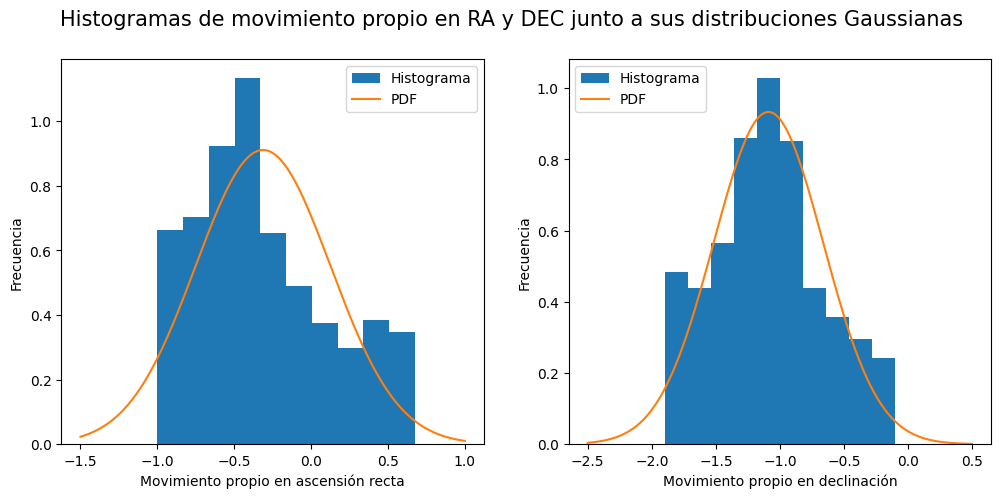

In [13]:
#Para esta parte, me guíe fuertemente por el Jupyter Notebook de la Clase 2
fig = plt.figure(figsize=(12,5))
fig.suptitle("Histogramas de movimiento propio en RA y DEC junto a sus distribuciones Gaussianas", fontsize=15)

#Gráfico para pmra
plt.subplot(1, 2, 1)
plt.hist(pmra, density=True, label = "Histograma")
plt.plot(x_pmra,fx_pmra, label="PDF")
plt.xlabel("Movimiento propio en ascensión recta")
plt.ylabel("Frecuencia")
plt.legend(loc = 'upper right')

#Gráfico para pmdec
plt.subplot(1, 2, 2)
plt.hist(pmdec, density=True, label = "Histograma")
plt.plot(x_pmdec,fx_pmdec, label='PDF')
plt.xlabel("Movimiento propio en declinación")
plt.ylabel("Frecuencia")
plt.legend(loc = 'upper left')

plt.show()

Repita la figura anterior y ahora agréguele a cada gráfica (pmra y pmdec) una franja vertical que abarque $\mu \pm \sigma$ utilizando **plt.axvspan()**

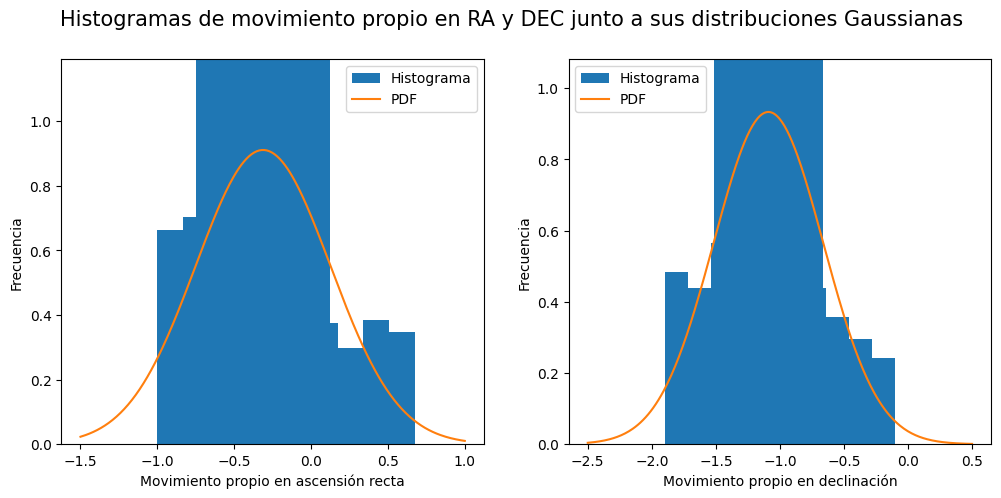

In [14]:
fig = plt.figure(figsize=(12,5))
fig.suptitle("Histogramas de movimiento propio en RA y DEC junto a sus distribuciones Gaussianas", fontsize=15)

#Gráfico para pmra
plt.subplot(1, 2, 1)
plt.hist(pmra, density=True, label = "Histograma")
plt.plot(x_pmra,fx_pmra, label="PDF")
plt.xlabel("Movimiento propio en ascensión recta")
plt.ylabel("Frecuencia")
plt.legend(loc = 'upper right')
plt.axvspan(mu_pmra-std_pmra,mu_pmra+std_pmra ) #Agregamos la franja vertical

#Gráfico para pmdec
plt.subplot(1, 2, 2)
plt.hist(pmdec, density=True, label = "Histograma")
plt.plot(x_pmdec,fx_pmdec, label='PDF')
plt.xlabel("Movimiento propio en declinación")
plt.ylabel("Frecuencia")
plt.legend(loc = 'upper left')
plt.axvspan(mu_pmdec-std_pmdec,mu_pmdec+std_pmdec ) #Agregamos la franja vertical

plt.show()

Según las gaussiaas obtenidas, ¿Cuál es la estimación para pmra y pmdec del cúmulo globular?

**Respuesta:** Según lo que se observa en el gráfico, la estimación para el movimiento propio en RA está en torno a -0.5, mientras que para el movimiento en DEC, se obtiene una estimación de -1.

# Segunda parte: Señal a Ruido
Para la siguiente parte deberá trabajar con datos de espectros con líneas de emisión. Un espéctro lo puede entender como un gráfico de potencia vs longitud de onda.

Abra el archivo **data_spectra.csv** con pandas y muestre el DataFrame. (No es necesario montar de nuevo el drive porque ya se hizo en la parte anterior).

Las columnas **obs** corresponden a observaciones (espectro) de un objeto, en la que cada valor corresponde a la potencia asociada a una longitud de onda. La columna **Wlth** corresponde a las longitudes de onda.

In [27]:
# Lea y muestre el DataFrame aquí
path_spectra = "/content/drive/MyDrive/Astro y Cs de Datos/data_spectra.csv"
data = pd.read_csv(path_spectra)

data

,Unnamed: 0,Wlth,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,...,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obs_18,obs_19,obs_20
0,0,13893.158801,0.673065,1.048759,1.135927,1.365672,1.205216,0.777480,0.777436,0.723454,...,0.851846,0.828067,0.964739,0.894189,0.734513,0.888324,0.764781,1.213573,0.952286,0.714581
1,1,13894.381791,1.218438,1.384774,0.647763,1.286700,1.223776,1.295540,1.289402,0.979057,...,0.792874,0.792945,1.115174,1.228799,0.755613,0.933819,1.020234,1.121144,1.394790,0.795326
2,2,13895.604780,1.244496,0.775893,1.213005,0.898531,1.203176,1.130615,1.133467,0.645016,...,1.221805,1.081824,0.871400,1.229938,0.928502,0.949589,1.276152,0.616311,1.130431,1.004481
3,3,13896.827769,1.395414,0.853016,0.929927,0.617134,1.101129,1.363642,0.810799,0.901758,...,0.847701,1.200020,1.196751,1.047428,0.729014,1.230125,1.368756,0.777179,0.810549,0.716121
4,4,13898.050759,1.013531,0.891468,1.125626,1.354080,0.681703,0.968364,0.630361,1.299735,...,0.612065,0.706618,0.696333,1.021694,1.160951,1.081304,1.387839,0.791448,0.876079,0.704909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1415,15623.688705,0.693123,1.222298,1.249391,1.105946,1.374470,0.780127,1.094418,1.061418,...,1.350584,0.760689,1.397787,0.627549,0.698279,0.815585,0.813801,1.079114,0.652794,0.897564
1416,1416,15624.911694,1.387281,1.332809,1.151107,1.254744,1.331042,0.979532,0.881491,1.209496,...,1.177786,0.711269,1.098026,0.829656,1.314102,1.167825,1.275656,0.947942,0.827006,1.365960
1417,1417,15626.134683,1.208096,0.914692,0.874394,1.083929,1.352754,0.606663,0.657862,1.055156,...,0.656540,0.970074,0.997054,1.222855,0.970080,1.306091,1.173684,0.832711,1.381874,1.149033
1418,1418,15627.357673,1.167845,1.261191,1.306496,0.945764,1.119779,0.892840,1.305614,0.618601,...,0.827102,0.619797,1.307590,0.979190,0.767770,1.170864,0.892064,1.355639,0.753463,1.000630


### a) Gráfico de primer espectro:
Grafique el espectro de la primera observación (columna **obs_1** vs columna **Wlth**) y responda: ¿Cuántas líneas de emisión detecta a simple vista?

**Respuesta:** A simple vista, se detecta una única línea de emisión, en torno a longitudes de onda de 15.250.

Aunque podría argumentarse que hay otras dos línes de emisión cercanas a la línea prominente que se distingue claramente, esto no concluyente. En mi opinión, me parece correcto afirmar que hay sola una línea de emisión.

Text(0, 0.5, 'Potencia')

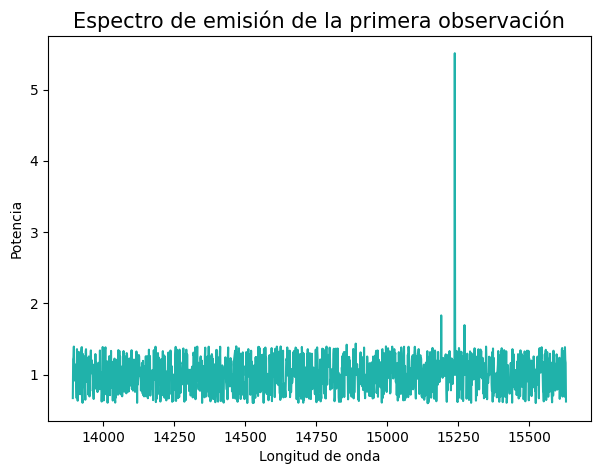

In [16]:
# Grafique aquí
obs_1 = data["obs_1"]
longitud_onda = data["Wlth"]

plt.figure(figsize=(7,5))
plt.plot(longitud_onda, obs_1, color="lightseagreen")
plt.title("Espectro de emisión de la primera observación" , fontsize=15)
plt.xlabel("Longitud de onda")
plt.ylabel("Potencia")
#Nos aseguramos de colocar título y ejes (y le cambiamos el color)

Notará que los valores del eje y están centrados alrededor de 1. Centre la observación en 0. Para esto, estime el valor medio del ruido y réstelo a todo el espectro ¿Cómo piensa que podria hacer esto?. Grafique el espectro resultante.

**Respuesta:** Calcularemos el promedio del ruido utilizando la función mean de scipy en la columna de la observación 1. Luego, le restamos este promedio a la columna completa.

Text(0, 0.5, 'Potencia')

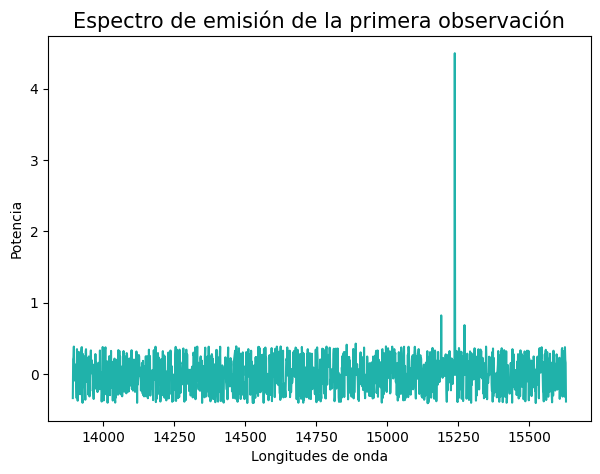

In [19]:
# Grafique el espectro centrado en 0 aquí
promedio_obs_1 = obs_1.mean()
obs_1_centrado = obs_1 - promedio_obs_1

plt.figure(figsize=(7,5))
plt.plot(longitud_onda, obs_1_centrado, color="lightseagreen")
plt.title("Espectro de emisión de la primera observación" , fontsize=15)
plt.xlabel("Longitudes de onda")
plt.ylabel("Potencia")

### b) Nivel de ruido:

En esta parte estimaremos el nivel de ruido de la la observación 1 de una forma distinta. Para esto siga los sigueintes pasos:

1. Tome la columna **obs_1** y guarde en la variable **ruido** un subconjunto de datos centrados en la media de **obs_1** con un margen de $\pm 3 \sigma$, con $\sigma$ la desviación estándar de **obs_1**.

Note que este subconjunto corresponde a ruido principalmente.

In [20]:
#Calculamos la desviación estándar de obs_1
std_obs_1 = obs_1.std()

#Ocupamos los datos centrados que calculamos en la celda de arriba y restringimos en un margen de ±3σ
ruido = obs_1[(obs_1_centrado >= -3*std_obs_1 ) & (obs_1_centrado <= 3*std_obs_1)]

2. Reste la media del ruido al espectro para centrar y grafique el espectro resultante.

Text(0, 0.5, 'Potencia')

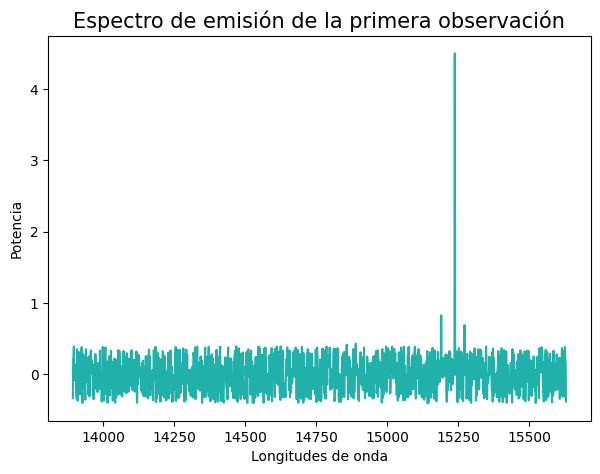

In [21]:
# Grafique el espectro centrado en 0 aquí

#Calculamos la media del ruido
media_ruido = ruido.mean()

#Lo restamos al espectro
obs_1_resultante = obs_1 - media_ruido

#Graficamos con pyplot
plt.figure(figsize=(7,5))
plt.plot(longitud_onda, obs_1_resultante, color="lightseagreen")
plt.title("Espectro de emisión de la primera observación" , fontsize=15)
plt.xlabel("Longitudes de onda")
plt.ylabel("Potencia")

3. Calcule $\sigma$ del ruido y grafique un margen de $\pm n*\sigma$ (con $n$ entero) sobre el espectro como dos líneas horizontales. ¿Qué valor de $n$ le parece adecuado y por qué? este será el nivel de ruido.

**Respuesta:** Escogí $n=2$ porque me parece que es el valor que mejor envuelve al ruido del espectro. Un $n$ menor deja fuera gran parte del espectro, mientras que un $n$ mayor se aleja demasiado del nivel de ruido detectado.

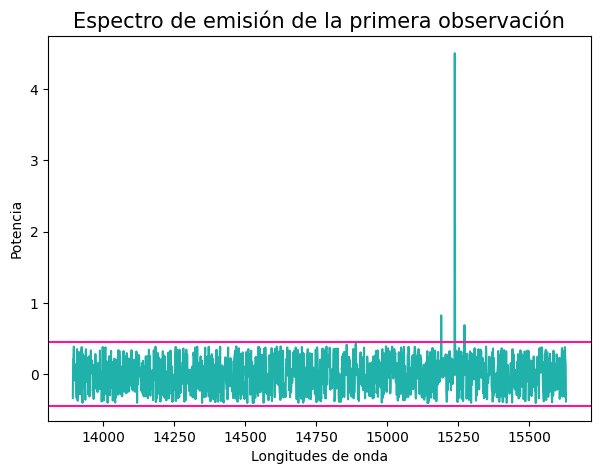

In [25]:
#Calculamos la desviación estándar del ruido
std_ruido = ruido.std()

#Graficamos
plt.figure(figsize=(7,5))
plt.plot(longitud_onda, obs_1_resultante, color="lightseagreen")
plt.title("Espectro de emisión de la primera observación" , fontsize=15)
plt.xlabel("Longitudes de onda")
plt.ylabel("Potencia")

#Graficamos las líneas horizontales. Referencia: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html
plt.axhline(2*std_ruido, color = "deeppink")
plt.axhline(-2*std_ruido, color = "deeppink")

### c) Disminución de $\sigma$

Ahora verá cómo el nivel de ruido disminuye al promediar observaciones. Siga los siguientes pasos:

1. Centre todas las observaciones en 0 de la misma manera hecha en ela parte b). Como consejo, puede recorrer las columnas del DataFrame con un for y modificar solo las que correspondan a una observación.

In [28]:
#Siguiendo la instrucción del enunciado, creamos un ciclo for para modificar las columnas correspondientes a observaciones

for i in range(1,21):
  #Accedemos a la columna de la i-ésima observación
  obs = data[f"obs_{i}"]

  #Siguiendo los mismos pasos que en la parte (b)...
  std_obs = obs.std()
  promedio_obs = obs.mean()
  obs_centrado = obs - promedio_obs #Calculamos los datos centrados en la media

  ruido = obs[(obs_centrado >= -3*std_obs ) & (obs_centrado <= 3*std_obs)] #Calculamos el ruido, mantendiéndonos en el margen de ±3σ
  media_ruido = ruido.mean()
  obs_resultante = obs - media_ruido #Restamos la media del ruido al espectro

  #Actualizamos los datos de la columna
  data[f"obs_{i}"] = obs_resultante

2. A continuación verá cómo cambia sigma a medida que promediamos los espectros. Para esto realice el siguiente algoritmo:

 - Calcule $\sigma$ de **obs_1**.
 - Promedie **obs_1** y **obs_2**, y calcule $\sigma$.
 - Promedie **obs_1**, **obs_2** y **obs_3**, y calcule $\sigma$.
 - Siga hasta haber promediado todas las observaciones (recuerde guardar los valores de $\sigma$)

 Añada al DataFrame una nueva columna **obs_all** que corresponda al promedio de todos los espectros.

In [29]:
#Creamos dos arrays de ceros para poder almacenar los promedios y la desviación estándar:
promedios = np.zeros(1420 * 19)
desviaciones_estandar = np.zeros(20)

#Calculamos la desviación estándar de obs_1 "manualmente" y la agregamos al array de desviaciones
desviaciones_estandar[0] = data[f"obs_{1}"].std()

#Inicialmente, calcularemos el promedio de dos columnas
n = 2

#Rango de posiciones del array 'promedios' en donde guardaremos los primeros promedios
(x,y) = (0,1420)

#Aquí iremos acumulando a las columnas
columnas = data[f"obs_{1}"]

#Posición del array 'desviaciones_estandar' en donde guardarmos la primera desviación estándar del ciclo for
j = 1


for i in range(2,21):
  #Acumulamos las columnas
  columnas += data[f"obs_{i}"]

  #Calculamos el promedio de las columnas
  promedio = columnas / n

  #Calculamos σ del promedio
  std_prom = promedio.std()

  #Almacenamos la información en los arrays auxiliares que creamos anteriormente
  promedios[x:y] = promedio
  desviaciones_estandar[j] = std_prom

  #Actualizamos nuestras variables para que pueda seguir iterando
  (x,y) = (x+1420, y+1420)
  j +=1
  n += 1

data["obs_all"] = promedios[25560:26980] #Estos últimos 1420 elementos corresponden al promedio de todas las 20 columnas

 3. Finalmente grafique los valores de $\sigma$ en funcion de $N$, con $N$ el numero de observaciones promediada. ¿Qué ocurre con $\sigma$? ¿Es esperado el resultado? Comente.

**Respuesta:** Según el Teorema del Límite Central, a medida que aumenta el tamaño de la muestra, los promedios de dichas muestras se aproximan a una distribución normal. En consecuencia, el valor de la desviación estándar debería disminuir a medida que aumentan las mediciones, lo que se coincide con lo expuesto en el gráfico.

Text(0, 0.5, 'Número de observaciones promediadas')

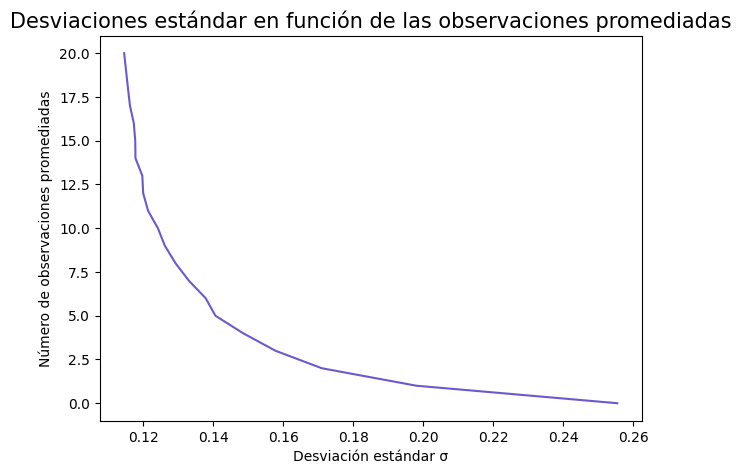

In [30]:
#Creamos un array de 20 número para el eje y:
eje_y = np.linspace(0, 20, 20, dtype=int)

#pyplot al rescate !!
plt.figure(figsize=(7,5))
plt.plot(desviaciones_estandar, eje_y, color="slateblue")
plt.title("Desviaciones estándar en función de las observaciones promediadas" , fontsize=15)
plt.xlabel("Desviación estándar σ")
plt.ylabel("Número de observaciones promediadas")

### d) Promedio de observaciones

Finalmente grafique el promedio de todas las observaciones (columna **obs_all** vs columna **Wlth**). ¿Cuántas líneas de emisión puede apreciar ahora? ¿Podría explicar a qué se debe? Comente.

**Respuesta:** En el nuevo gráfico, es posible distinguir entre 4 y 5 líneas de emisión. Todavía se observa la más prominente en torno a la longitud de onda de 15.250, pero ahora se perciben otras dos líneas en la vecindad de la principal, así como algunas líneas adicionales alrededor de la longitud de onda de 14.850. Esto ocurre porque, al promediar todas las observaciones del DataFrame, se logró reducir considerablemente el ruido, permitiendo que las señales verdaderas se vuelvan fácilmente perceptibles.

Text(0, 0.5, 'Potencia')

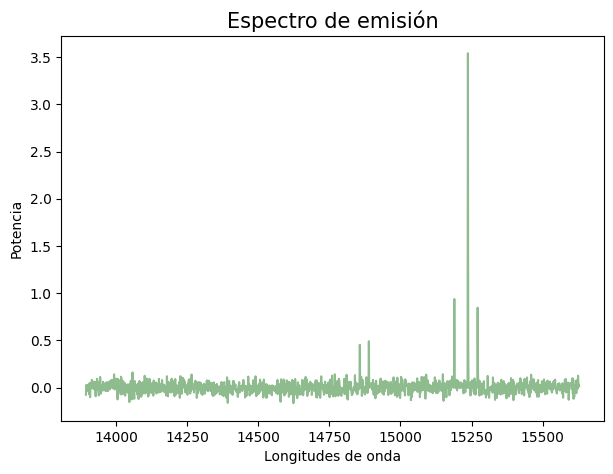

In [31]:
plt.figure(figsize=(7,5))
plt.plot(longitud_onda, data["obs_all"], color="darkseagreen")
plt.title("Espectro de emisión" , fontsize=15)
plt.xlabel("Longitudes de onda")
plt.ylabel("Potencia")